In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from zipfile import ZipFile

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

In [34]:
#Load data - please don't change this part. 
df = pd.read_csv("Student Performance new.csv")
df.drop(columns={"Unnamed: 0"}, inplace=True)
df.head(15)

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M
5,group B,associate's degree,standard,none,0.71,0.83,0.78,F
6,group B,some college,standard,completed,0.88,0.95,0.92,F
7,group B,some college,free/reduced,none,0.40,0.43,0.39,M
8,group D,high school,free/reduced,completed,0.64,0.64,0.67,M
9,group B,high school,free/reduced,none,0.38,0.60,0.50,F


<h1>Part 1: Is There a Significant Difference Between Boys and Girls in Math? (10 pts) </h1>

Investigate and justify your answer. You should show 'a few' pieces of evidence to bolster your conclusion. Use your judgement on what makes a good piece of evidence.

Please format your justifications in a:
<ul>
<li>List
<li>of
<li>points.
</ul>

In [29]:
#Difference in math
f = df[df['sex']== 'F']
m = df[df['sex']== 'M']
print('Male mean: ', m['math percentage'].mean())
print('Female mean: ', f['math percentage'].mean())

Male mean:  0.6872821576763488
Female mean:  0.636332046332046


In [19]:
print('Females')
print(f['math percentage'].describe())
print('Males')
print(m['math percentage'].describe())

Females
count    518.000000
mean       0.636332
std        0.154915
min        0.000000
25%        0.540000
50%        0.650000
75%        0.740000
max        1.000000
Name: math percentage, dtype: float64
Males
count    482.000000
mean       0.687282
std        0.143563
min        0.270000
25%        0.590000
50%        0.690000
75%        0.790000
max        1.000000
Name: math percentage, dtype: float64


C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


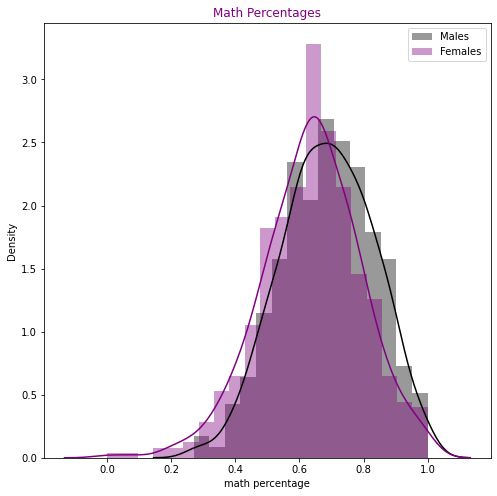

In [28]:
sns.distplot(m['math percentage'], color='black', label='Males')
sns.distplot(f['math percentage'], color='purple', label='Females')
thinkplot.Config()
plt.title('Math Percentages', color='purple')
plt.show()

Comparison of male to female math scores
<li> Generally, male scores are 4% higher than females scores. This is show in the 25%, 50%, and 75% scores above. 
<li> there are more girls than boys.
<li> Males have a min of 0 and females have a min of 27%
Overall, I would say there is not a significant difference. If the number were higher than 4% then there would be. 

<h1>Part 2: Is there a difference in math performance depending on Parental Education (15 pts)</h1>

Investigate and justify your answer. You should show 'a few' pieces of evidence to bolster your conclusion.

In [35]:
#Differnce in math
df["parental level of education"].value_counts().sort_values(ascending=False)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

<h1>What appears to be the best predictor of writing performance? (10pts)</h1>

Justify your answer with about 2-3 sentences. Please also show the analysis that you did to draw your conclusion. There are multiple ways that you could come to a conclusion. 

In [ ]:
#Predictor of writing performance

<h1>How well can the population read? (25 pts)</h1>
<ul>
<li>The test designers tell us that a score over 55% on the reading test is a good cutoff for being functionally literate. Given that, what percentage of test takers qualify as literate? (5 pts)
<li>Assume that the test score results on this test reasonably represents the population. What is the expected mean score for the population at large, and what is the range in which you are 92% confident the population mean lies in? (15 pts)
<li>Please demonstrate your 92% confidence from above in a graphical format (5pts)
</ul>

In [ ]:
#Reading

<h1>What are the odds...(10 pts)</h1>

M&M's are small candy-coated chocolates that come in a variety of colors.  
Mars, Inc., which makes M&M's, changes the mixture of colors from time to time.
In 1995, they introduced blue M&M's.  

* In 1994, the color mix in a bag of plain M&M's was 30\% Brown, 20\% Yellow, 20\% Red, 10\% Green, 10\% Orange, 10\% Tan.  

* In 1996, it was 24\% Blue , 20\% Green, 16\% Orange, 14\% Yellow, 13\% Red, 13\% Brown.

Suppose a friend of mine has two bags of M&M's, and he tells me
that one is from 1994 and one from 1996.  He won't tell me which is
which, but he gives me one M&M from each bag.  One is yellow and
one is green.  What is the probability that the yellow one came
from the 1994 bag?

Hint: The trick to this question is to define the hypotheses and the data carefully.

In [ ]:
#Probability

<h1>911 Calls (10pts)</h1>
<ul>
<li>For this data, what is the mean time in between 911 calls. (Note: this will require some manipulation of data - Google "pandas date" and "date difference in minutes" as a starting point. It is not super complex, apx 2-4 lines or so) (5pts)
<li>What is a good distribution to model this? (5pts)
</ul>

In [ ]:
#read file - Don't change this part. 
calls = ""
with ZipFile('911_2.csv.zip') as myzip:
    with myzip.open('911_2.csv') as myfile:
       calls = pd.read_csv(myfile)
calls.head()

In [ ]:
#Generate Time Between Calls
